In [1]:
import eeg_pwr
import os
import numpy as np

In [2]:
direct='C:/Users/Phil/Box Sync/Classes/PSC_290_Final/data'
mont=os.path.join(direct, 'BP64_acti_64rows.sfp')

#event mappings for the test data
evMaps={'1': 1, '2': 2, '3': 3, '48': 48, '77': 77, '88':88, '100': 100, '200' : 200}

In [3]:
%%capture

#initate class, load data, create epochs and bootstrap data
dats=eeg_pwr.boots(fileDir=direct, dataType='cnt', montage=mont, eventMap=None)
dats.load_data()

dats.epoch_subjects(tmin=-.2, tmax=.8, baseline=(None,0.0), 
                    event=['1', '2', '3'], chans=None, store=True)

dats.mean_amplitude(flatten_axes=1, boots=1000, return_stats=['std'])


In [4]:
#access mean SE across electrodes for each subject
dats.get_error(across='electrode', type='mean')

array([9.11914674e-06, 9.34851273e-06, 6.15395640e-06, 4.54283257e-06,
       1.11884291e-05, 1.11164138e-05, 9.48031789e-06, 7.55473188e-06,
       6.25001606e-06])

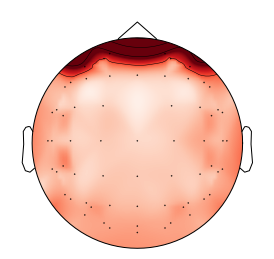

In [5]:
#visualize the mean data quality per subject
dats.plot_quality_topo(across='subject', stat='mean')

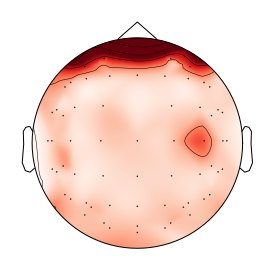

In [6]:
#visual the variablility in data quality per subject
dats.plot_quality_topo(across='subject', stat='std')

AttributeError: 'numpy.ndarray' object has no attribute 'spines'

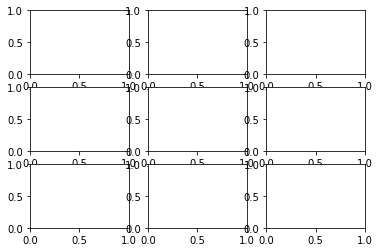

In [7]:
#do a power analysis across different levels of n Subjects and effect sizes
dats.power_analysis(nSubs=[1, 10, 20, 50], ES=np.arange(.0001, .1, .001))
dats.power_table(channels=['Fz', 'Cz', 'Pz'])

{'power_values': array([[[0.0236, 0.0271, 0.0263, ..., 0.0228, 0.0256, 0.0251],
         [0.024 , 0.0284, 0.0274, ..., 0.0271, 0.024 , 0.0261],
         [0.0269, 0.0252, 0.0232, ..., 0.0258, 0.0248, 0.0262],
         [0.0273, 0.0232, 0.0261, ..., 0.0288, 0.0287, 0.028 ]],
 
        [[0.0276, 0.0242, 0.025 , ..., 0.0236, 0.0254, 0.0262],
         [0.0257, 0.0278, 0.0228, ..., 0.0239, 0.0259, 0.0269],
         [0.0243, 0.0257, 0.0263, ..., 0.0299, 0.0263, 0.0257],
         [0.0231, 0.0236, 0.0254, ..., 0.0242, 0.0272, 0.0308]],
 
        [[0.0257, 0.0252, 0.0244, ..., 0.0269, 0.0285, 0.0276],
         [0.0245, 0.0245, 0.0252, ..., 0.0307, 0.0345, 0.0307],
         [0.0225, 0.0245, 0.0233, ..., 0.0307, 0.0383, 0.0321],
         [0.0228, 0.026 , 0.0263, ..., 0.0412, 0.0422, 0.0419]],
 
        ...,
 
        [[0.0275, 0.0247, 0.0282, ..., 0.0258, 0.0281, 0.0278],
         [0.0242, 0.024 , 0.0229, ..., 0.0317, 0.0306, 0.0318],
         [0.026 , 0.0235, 0.0248, ..., 0.0384, 0.0348, 0.0347],
